## Table of Content

1. **[Topic Introduction](#dis)**
2. **[Import Libraries](#lib)**
3. **[Plots](#var)**
4. **[Exploratory Data Analysis](#dist)**
5. **[Model Building](#sample)**
6. **[Conclusion](#samp)**


<a id="dis"></a>
###                            Topic - Stroke Prediction using Machine Learning

**Introduction**

Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to
the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen
and nutrients for its correct functioning. The other way around, the brain is not able to drain and
expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is
in a critical condition as brain cells will imminently begin to die.
The American Stroke Association indicates that stroke is the fifth cause of death and disability in
the United States. For this reason, stroke is considered a severe disease and has been the
subject of extensive research, not only in the medical field but also in data science and machine
learning studies.


**Dataset Description**

The dataset used in this article contains 5110 records of patients. Each patient has 12 columns
each referring to a concrete attribute. Most of these attributes correspond to medical records or
the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average
glucose levels in the blood, and body mass index (BMI). As we can observe from these first
attributes, the dataset provides relevant data regarding the likelihood of patients suffering from
stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has
suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact,
stroke is also an attribute in the dataset and indicates in each medical record if the patient
suffered from a stroke disease or not.

**Data Dictionary**
a)Id - Unique Id
b)gender
c)age
d)hypertension - Binary Feature
e)Heart_disease - Binary Feature
f)Ever_married - Has the patient ever been married
g)Work_type - Work type of a patient
h)Residency_type - Residency type of patient
i)avg_glucose_level - Average Glucose level in the blood
j)bmi - Body mass Index
k)smoking_status - Smoking status of the patient
l)stroke - stroke even

<a id="lib"></a>
### Import The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,minmax_scale,OrdinalEncoder
import statsmodels.stats as sms
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_classif
from xgboost import XGBClassifier
import plotly.express as px


In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')


In [3]:
fig = px.scatter_matrix(df, color='stroke', title='Pairplot of Stroke Dataset', 
                         dimensions=['age', 'avg_glucose_level', 'bmi'])
fig.update_traces(diagonal_visible=False)
fig.show()


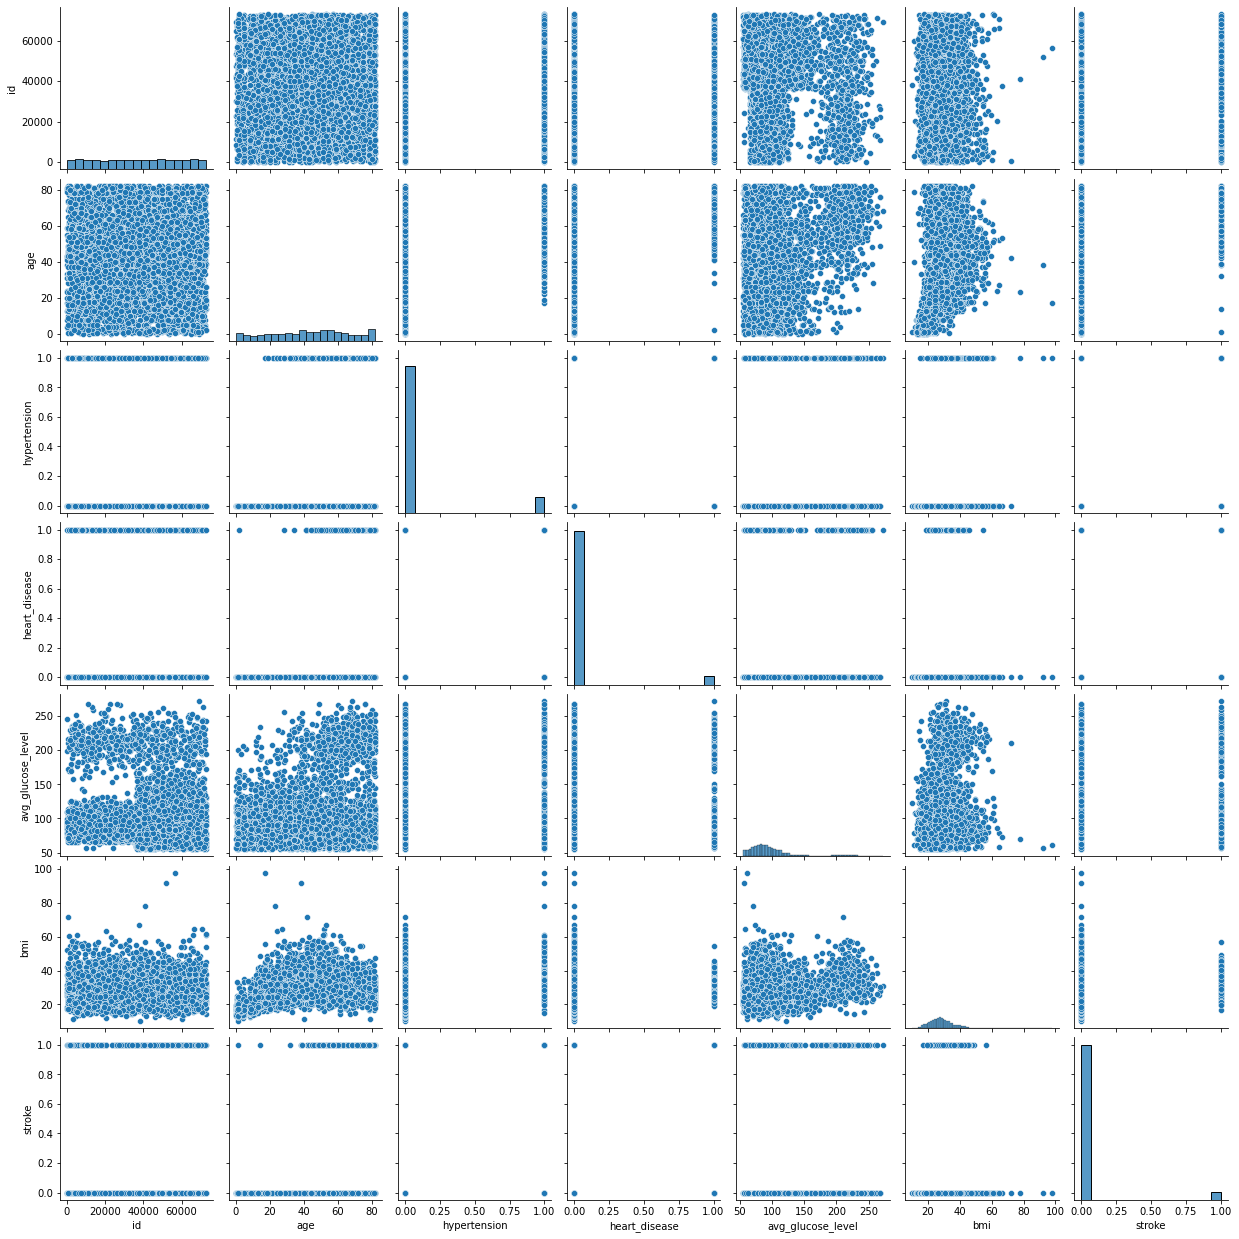

In [3]:
sns.pairplot(df,palette='Set2')

<a id="var"></a>
### Plots

In [4]:
fig = px.histogram(df, x="work_type", color="stroke")
fig.update_layout(title="Stroke occurrence by Work Type")
fig.show()


In [5]:
fig = px.histogram(df, x='ever_married', color='stroke')
fig.update_layout(xaxis_title='Ever Married', yaxis_title='Count', barmode='group')
fig.show()


In [6]:
print('Unique Values\n',df['Residence_type'].unique())
print("Value Counts\n",df['Residence_type'].value_counts())


fig = px.histogram(df, x='Residence_type', color='stroke', 
                   color_discrete_sequence=['#636EFA', '#EF553B'], 
                   title='Countplot of Residence Type and Stroke')
fig.update_layout(xaxis_title='Residence Type', yaxis_title='Count', barmode='group')
fig.show()



Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


In [7]:
print('Unique Values\n',df['smoking_status'].unique())
print('Value Counts\n',df['smoking_status'].value_counts())



fig = px.histogram(df, x='smoking_status', color='stroke',
                   color_discrete_sequence=px.colors.qualitative.Pastel1, 
                   title='Countplot of Smoking Status and Stroke')
fig.update_layout(xaxis_title='Smoking Status', yaxis_title='Count', barmode='group')
fig.update_traces(opacity=0.75) # Set bar opacity
fig.show()



Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [8]:
print('Unique values\n',df['gender'].unique())
print('Value Counts\n',df['gender'].value_counts())

fig = px.histogram(df, x='gender', color='stroke', animation_frame='age',
                   color_discrete_map={'0': '#636EFA', '1': '#EF553B'})
fig.update_layout(xaxis_title='Gender', yaxis_title='Count', 
                  title='Countplot of Gender and Stroke by Age Group',
                  coloraxis=dict(colorbar=dict(title='Stroke', tickvals=[0, 1], ticktext=['No', 'Yes'])))
fig.show()

#  to analyze how gender will affect chances of stroke
plt.show()

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [9]:
fig = px.histogram(df, x='age', nbins=30)
fig.show()

fig = px.box(df, x='stroke', y='age')
fig.update_layout(title='Boxplot of Age and Stroke')
fig.show()


In [14]:
print('Unique Values\n',df['smoking_status'].unique())
print('Value Counts\n',df['smoking_status'].value_counts())

fig = px.histogram(df, x='smoking_status', color='stroke', 
                   color_discrete_sequence=['#636EFA', '#EF553B'], 
                   animation_frame='age', animation_group='work_type', 
                   title='Countplot of Smoking Status and Stroke by Age and Work Type')
fig.update_layout(xaxis_title='Smoking Status', yaxis_title='Count', barmode='group')
fig.show()

# Smoking Status with respect to Stroke


Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<a id="dist"></a>
### EDA

### 1. Read the dataset and view the first 10 rows of it.


In [38]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

### 2. Check the shape/dimension of the dataset


In [39]:
print('Shape-->',df.shape)
print('No of Dimension-->',df.ndim)

Shape--> (5110, 12)
No of Dimension--> 2


### 3. Check for the missing values.Display number of missing values per column.


In [40]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 4. Investigate and predict the missing BMI Value.


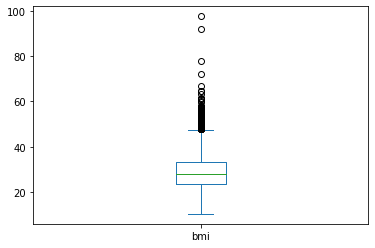

In [41]:
df['bmi'].plot(kind='box')
q1=df.quantile(.25)
q3=df.quantile(.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR


In [42]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [43]:
# Before Outlier Treatment
df.shape

(5110, 12)

In [44]:
# Outlier Treatment
# df=df[~((df<ll)|(df>ul)).any(axis=1)]
# Not Required

In [3]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [47]:
df.bmi.isnull().sum()

0

### 5. Check the datatype, number of non null values and name of each variable in the dataset.


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 6. Check the descriptive statistics of the dataset.


In [49]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.698018     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  
75%           114.090000    32.800000     0.000000  
max           271.740000    97.600000     1.000000

In [50]:
df.describe(include='O')

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

### 7. Visualize the proportion of Stroke samples in the dataset.


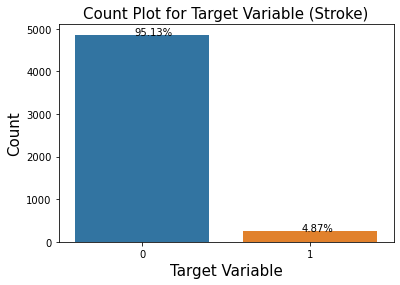

In [16]:

sns.countplot(df['stroke'])
plt.text(x = -0.05, y = df['stroke'].value_counts()[0] + 1, s = str(round((df['stroke'].value_counts()[0])*100/len(df['stroke']),2)) + '%')
plt.text(x = 0.95, y = df['stroke'].value_counts()[1] +1, s = str(round((df['stroke'].value_counts()[1])*100/len(df['stroke']),2)) + '%')

plt.title('Count Plot for Target Variable (Stroke)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()


### 8. Visualize the Distribution of Male and Female Ages. Write the Observation.


In [19]:
fig = px.histogram(df, x='gender', color='age', animation_frame='age',
                   color_discrete_map={'0': '#636EFA', '1': '#EF553B'})
fig.update_layout(xaxis_title='Gender', yaxis_title='Count', 
                  title='DIstribution of Gender and Age Group',
                  coloraxis=dict(colorbar=dict(title='Stroke', tickvals=[0, 1], ticktext=['No', 'Yes'])))

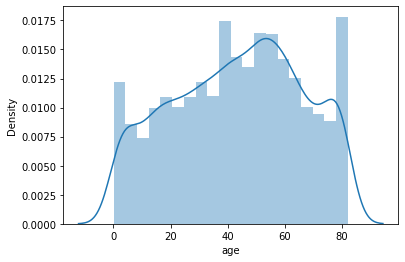

In [52]:
sns.distplot(df['age'],hu)
plt.show()

### 10.Visualize the stroke sample based on
- a) BMI and Glucose Level
- b) BMI and Age


In [27]:
plt.figure(figsize=(8,9))

fig = px.scatter(df, x='bmi', y='avg_glucose_level', color='stroke', 
                 color_discrete_sequence=['#636EFA', '#EF553B'], 
                 title='Scatterplot of BMI and Average Glucose Level with Stroke')
fig.update_layout(xaxis_title='BMI', yaxis_title='Average Glucose Level')
fig.show()



<Figure size 576x648 with 0 Axes>

In [34]:
plt.figure(figsize=(8,9))

fig = px.scatter(df, x='bmi', y='age', color='stroke', 
                 color_discrete_sequence=['#636EFA', '#EF553B'], 
                 title='Scatterplot of BMI and age with Stroke')
fig.update_layout(xaxis_title='BMI', yaxis_title='Average Glucose Level')
fig.show()


<Figure size 576x648 with 0 Axes>

### 11. Using the pie chart visualizes the proportion of different smoking categories among the  stroke population.
  


In [55]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

<AxesSubplot:ylabel='smoking_status'>

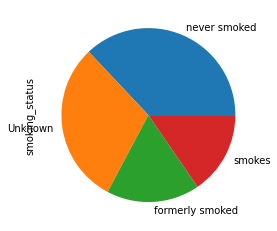

In [56]:
df['smoking_status'].value_counts(normalize=True).plot(kind='pie')

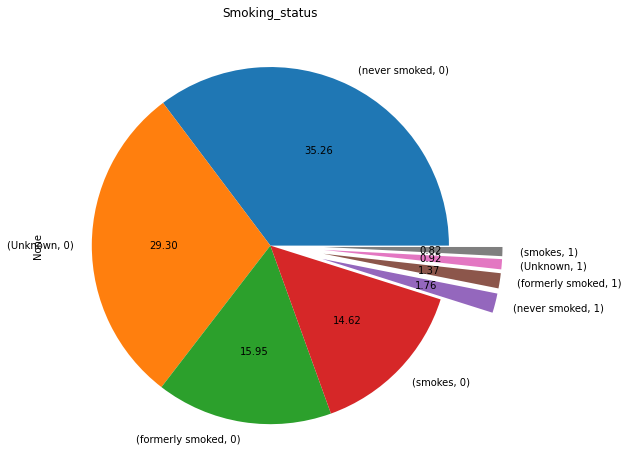

In [57]:
plt.figure(figsize=(8,9))
df[['smoking_status','stroke']].value_counts(normalize=True).plot(kind='pie',autopct='%.2f',
                                                                  explode=[0,0,0,0,0.3,0.3,0.3,0.3])
plt.title('Smoking_status')
plt.show()

In [35]:


fig = px.pie(df, names='smoking_status', values='stroke', 
             title='Proportion of Stroke Cases by Smoking Status')
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker=dict(colors=['#636EFA', '#EF553B', '#00CC96', '#FFA15A'], 
                              line=dict(color='#FFFFFF', width=1.5)), 
                  pull=[0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2])
fig.show()


### 12. Perform hypothesis testing to find the significant variables.


In [58]:
dataset=['Stroke Predictor']
columns=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']


In [46]:
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder

In [44]:
cat_cols = ['gender', 'ever_married',
            'work_type', 'Residence_type', 'smoking_status']

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(col, 'p-value:', p)

cont_cols = ['age', 'avg_glucose_level', 'bmi','heart_disease','hypertension']
print('-'*15)
for col in cont_cols:
    stroke_yes = df[df['stroke'] == 1][col]
    stroke_no = df[df['stroke'] == 0][col]
    t, p = ttest_ind(stroke_yes, stroke_no, equal_var=False)
    print(col, 'p-value:', p)

gender p-value: 0.7895490538408245
ever_married p-value: 1.6389021142314745e-14
work_type p-value: 5.397707801896119e-10
Residence_type p-value: 0.29833169286876987
smoking_status p-value: 2.0853997025008455e-06
---------------
age p-value: 2.1156848483472115e-95
avg_glucose_level p-value: 2.4014366563697247e-11
bmi p-value: 0.00035905688592909583
heart_disease p-value: 4.094627208774952e-08
hypertension p-value: 1.9784813463925777e-09


In [61]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### 13. Drop the unnecessary columns.


In [47]:
df.drop('id',axis=1,inplace=True)
le=LabelEncoder()

### 14. Write the code to replace following categories columns in integer format as follow –
- a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
- b) ever_married('Yes': 1, 'No': 0)
- c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)


In [5]:
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['gender']=le.fit_transform(df['gender'])

In [6]:
df['work_type']=le.fit_transform(df['work_type'])

In [7]:
df['ever_married']=df['ever_married'].map({'Yes': 1, 'No': 0})
df['smoking_status']=df['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})

In [102]:
df[['work_type','ever_married','smoking_status']].sample(5)

work_type  ever_married  smoking_status
1526          0             1              -1
4955          2             1               2
2891          2             1               2
3156          3             1               0
4105          3             0              -1

### 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.


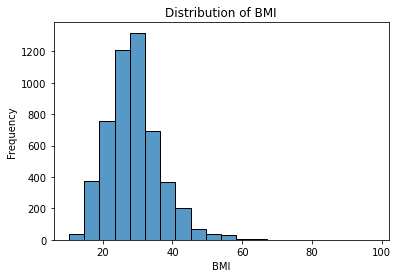

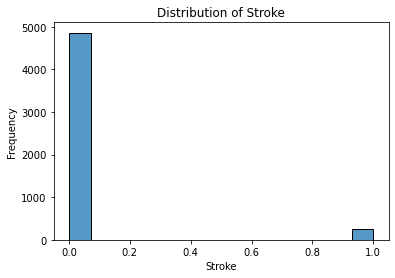

In [51]:
sns.histplot(df['bmi'], bins=20)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['stroke'])
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.show()


### 16. List down columns that are highly skewed.


In [10]:
df.skew().to_frame().sort_values(by=0,ascending=False).style.highlight_max(color='LightBlue')

### 17. List down the columns that are highly kurtosis.


In [9]:
df.kurt().to_frame().sort_values(0,ascending=False).style.highlight_max(color='red')

### 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.


In [54]:
for col in cat_cols:
    freq_table = pd.crosstab(df[col], df['stroke'])
    print(col)
    print(freq_table)
    print()

gender
stroke     0    1
gender           
0       2853  141
1       2007  108
2          1    0

ever_married
stroke           0    1
ever_married           
0             1728   29
1             3133  220

work_type
stroke        0    1
work_type           
0           624   33
1            22    0
2          2776  149
3           754   65
4           685    2

Residence_type
stroke             0    1
Residence_type           
0               2400  114
1               2461  135

smoking_status
stroke             0   1
smoking_status          
-1               747  42
 0              1802  90
 1              1497  47
 2               815  70



In [55]:
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            print(col1, 'vs', col2, 'p-value:', p)
            print(contingency_table)
            print()

gender vs ever_married p-value: 0.03765357700623182
ever_married    0     1
gender                 
0             993  2001
1             763  1352
2               1     0

gender vs work_type p-value: 8.503150002091437e-07
work_type    0   1     2    3    4
gender                            
0          399  11  1754  504  326
1          258  11  1170  315  361
2            0   0     1    0    0

gender vs Residence_type p-value: 0.5424771131010444
Residence_type     0     1
gender                    
0               1465  1529
1               1048  1067
2                  1     0

gender vs smoking_status p-value: 1.5603072385938315e-10
smoking_status   -1     0    1    2
gender                             
0               452  1229  836  477
1               337   663  708  407
2                 0     0    0    1

ever_married vs gender p-value: 0.03765357700623181
gender           0     1  2
ever_married               
0              993   763  1
1             2001  1352  0

ever_mar

In [71]:
cont_cols = ['age', 'avg_glucose_level', 'bmi']

for col in cont_cols:
    stroke_yes = df[df['stroke'] == 1][col]
    stroke_no = df[df['stroke'] == 0][col]
    t, p = ttest_ind(stroke_yes, stroke_no, equal_var=False)
    print(col, 'p-value:', p)
    print('Stroke = 1')
    print(stroke_yes.describe())
    
    print('Stroke = 0')
    print(stroke_no.describe())
    print()

age p-value: 2.1156848483472115e-95
Stroke = 1
count    249.000000
mean      67.728193
std       12.727419
min        1.320000
25%       59.000000
50%       71.000000
75%       78.000000
max       82.000000
Name: age, dtype: float64
Stroke = 0
count    4861.000000
mean       41.971545
std        22.291940
min         0.080000
25%        24.000000
50%        43.000000
75%        59.000000
max        82.000000
Name: age, dtype: float64

avg_glucose_level p-value: 2.4014366563697247e-11
Stroke = 1
count    249.000000
mean     132.544739
std       61.921056
min       56.110000
25%       79.790000
50%      105.220000
75%      196.710000
max      271.740000
Name: avg_glucose_level, dtype: float64
Stroke = 0
count    4861.000000
mean      104.795513
std        43.846069
min        55.120000
25%        77.120000
50%        91.470000
75%       112.830000
max       267.760000
Name: avg_glucose_level, dtype: float64

bmi p-value: 0.00035905688592909583
Stroke = 1
count    249.000000
mean      30.

### 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation.
- Especially note down columns that are highly correlated (Positive or negative correlation,
- consider 0.7 to 1 as high)


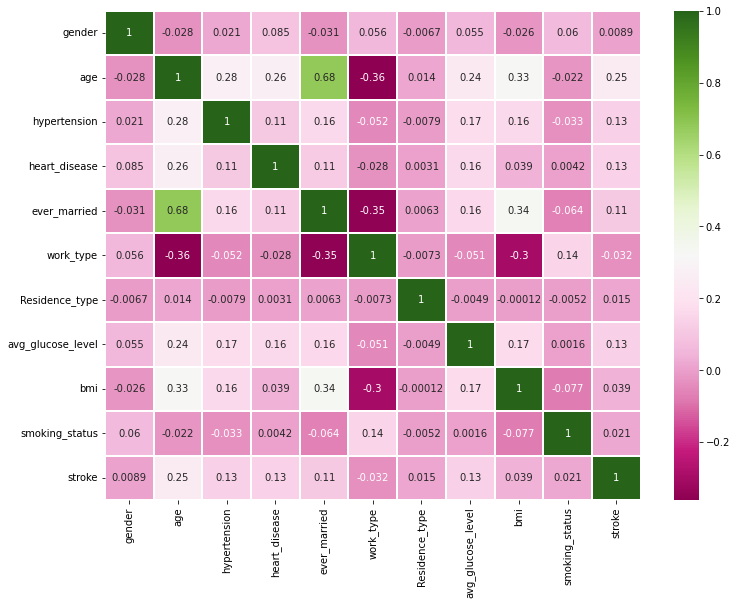

In [56]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,cmap="PiYG")
plt.show()
# the variables are showing correlation age, hypertension, heart_disease, ever_married, avg_glucose_level.

### 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.


In [77]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type            float64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [4]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [11]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1255,test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3832, 10)
(1278, 10)
(3832,)
(1278,)


### 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach
- to balanced the dataset by using the correct technique.


As we know, our dataset is imbalanced. So let’s balance our data.
We are going to use SMOTE method for this. It will populate our data 
with records similar to our minor class. Usually, we perform this on the 
whole dataset but as we have very fewer records of minor class we   apply it on both train 
and test data. Earlier we tried doing it by just resampling data of the training dataset but it didn’t perform 
that well so I tried this approach and got a good result.

In [81]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1        0.0   
1       0  61.0             0              0             1        NaN   
2       1  80.0             0              1             1        0.0   
3       0  49.0             0              0             1        0.0   
4       0  79.0             1              0             1        NaN   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               2       1  
1               0             202.21  28.893237               0       1  
2               0             105.92  32.500000               0       1  
3               1             171.23  34.400000              -1       1  
4               0             174.12  24.000000               0       1

In [110]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [111]:
from imblearn.over_sampling import SMOTE

### Select the Significant Features

In [60]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop('stroke',axis=1),df['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

Attribute       Score
1                age  326.916568
3      heart_disease   94.698406
7  avg_glucose_level   90.503870
2       hypertension   84.953542
4       ever_married   60.667230
8                bmi    7.759776
5          work_type    5.340019
9     smoking_status    2.249745
6     Residence_type    1.220842
0             gender    0.407266

In [12]:
# We select only Significant Features to build the model
X=df[['age','hypertension','heart_disease','ever_married','avg_glucose_level']]
y=df['stroke']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1255,test_size=0.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
# BEFORE

((3832, 5), (1278, 5), (3832,), (1278,))

In [14]:
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)
X_test,y_test=smote.fit_resample(X_test,y_test)

In [15]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# After

(7296, 5) (7296,) (2426, 5) (2426,)


<a id="sample"></a>
### Model Building

### 22. Model Selection/hyperparameter tuning
 - Try different models and fine tune their performance until you get the desired level of 
   performance on the given dataset

   Model Evaluation 
 - Evaluate the models using appropriate evaluation metrics

# Random Forest Classifier

In [16]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_rfc_pred=rfc.predict(X_test)

In [17]:
print('accuracy_score',accuracy_score(y_test,y_rfc_pred))
print('f1_score',f1_score(y_test,y_rfc_pred))

accuracy_score 0.6871393239901071
f1_score 0.5969198088157196


#  Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dec=DecisionTreeClassifier()
dec.fit(X_train,y_train)
y_DEC_pred=dec.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_DEC_pred))
print('f1_score',f1_score(y_test,y_DEC_pred))

accuracy_score 0.6871393239901071
f1_score 0.5977742448330683


# XGB
Extreme Gradient boosting is a supervised learning algorithm,
which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.
Ignores Outliers
XGBClassifier is not affected by Outliers
High predictive accuracy: XGBoost is known for its high accuracy and can often outperform other popular algorithms, such as Random Forest and Gradient Boosting.

Regularization: XGBoost includes regularization techniques, such as L1 and L2 regularization, which help to prevent overfitting of the model to the training data.

In [21]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=1000,max_depth=5,learning_rate=0.001,n_jobs=-1)
xgc.fit(X_train,y_train)
predict=xgc.predict(X_test)
print('Accuracy --> ',accuracy_score(predict,y_test))
print('F1 Score --> ',f1_score(predict,y_test))
print('Classification Report  --> \n',classification_report(predict,y_test))

Accuracy -->  0.781121187139324
F1 Score -->  0.7822878228782287
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1200
           1       0.79      0.78      0.78      1226

    accuracy                           0.78      2426
   macro avg       0.78      0.78      0.78      2426
weighted avg       0.78      0.78      0.78      2426



In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [25]:
confusion_matrix(y_test,predict)

array([[941, 272],
       [259, 954]], dtype=int64)

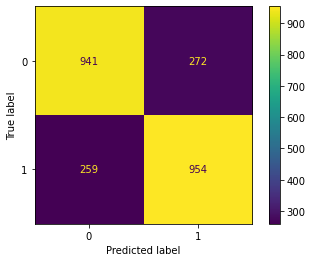

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,predict)
plt.show()
# its predicting the true prediction accurately and also false predictions accurately
# In this case, the model correctly predicted 941 true negative cases and 954 true positive cases,
# but misclassified 272 false positive cases and 259 false negative cases.

### XGB is showing improvements in the scoring ,Lets tune the model

### Tuning XGB

In [81]:
from sklearn.model_selection import GridSearchCV

In [83]:
xgb = XGBClassifier(objective='binary:logistic')

params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Mean CV Score: ", grid_search.best_score_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
Best Mean CV Score:  0.9501173631780071


In [85]:
y_pred=grid_search.predict(X_test)

In [86]:
print('Accuracy --> ',accuracy_score(y_pred,y_test))
print('F1 Score --> ',f1_score(y_pred,y_test))
print('Classification Report  --> \n',classification_report(y_pred,y_test))

Accuracy -->  0.9105523495465787
F1 Score -->  0.905446623093682
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.96      0.87      0.92      1344
           1       0.86      0.96      0.91      1082

    accuracy                           0.91      2426
   macro avg       0.91      0.92      0.91      2426
weighted avg       0.92      0.91      0.91      2426



after Tuning it has improved a Lot and we conclude that XGB works upto Expectations

# Feature Importance

In [97]:
x=pd.DataFrame(rfc.feature_importances_,index=X_train.columns)

<AxesSubplot:>

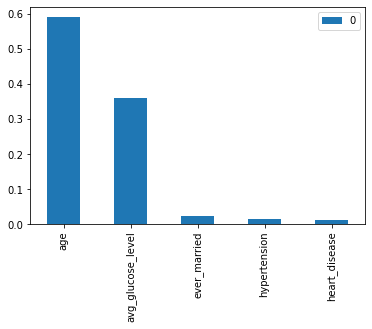

In [102]:
x.sort_values(0,ascending=False).plot(kind='bar')

<a id="samp"></a>
### Conclusion

So in this mini-project, we saw some of the factors that might result in strokes. 
Where Age was highly correlated followed by hypertension, heart disease, avg glucose level, and ever married.
XGBClassifier  performed well. There are outliers in some variable, reason behind why I kept 
it as it is because these things are either depends on other factors and there are possibilities of having such
kind of records. For example, BMI can be high and still no stroke as a person is young or he does
not have any heart disease.